# **PROJETO 1 - TURING ACADEMY**

## **PRIMEIROS PASSOS E ANÁLISE INICIAL**

In [142]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [143]:
#importando o dataframe
df = pd.read_csv("df_athlete_events.csv")

In [144]:
#primeira visualização dos dados
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Uma primeira ideia é fixar o ID dos atletas como o index do nosso dataset. 

Vamos, antes disso, checar se isso é possível.

In [145]:
#checando o tipo do ID
df["Athlete_ID"].dtype

dtype('int64')

Vemos que, como esperávamos, o tipo do ID é inteiro.

Feito isso, vamos ver se há IDs duplicados e qualquer outra duplicata no nosso dataframe.

In [146]:
#checando as duplicatas parciais quanto ao ID, Jogos e Eventos
values= ['Athlete_ID', 'Games', 'Event']
df[df.duplicated(subset=values, keep = False)]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
521,2317,Auguste Albert,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver
522,2317,Auguste Albert,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Bronze
2407,8683,Jacques Baudrier,M,28.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver
2408,8683,Jacques Baudrier,M,28.0,NaN,NaN,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze
3607,12115,Gaston Frdric Blanchy,M,31.0,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39807,119449,Texier II,M,NaN,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
41403,124115,Henri Jules Valton,M,33.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver
41404,124115,Henri Jules Valton,M,33.0,NaN,NaN,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze
42217,126533,Franois Antoine Vilamitjana (Caubet-),M,53.0,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver


No ano de 1900, a prova mista de Vela foi realizada com duas regatas, ou seja, duas provas olímpicas para cada classe. 

Dessa forma, os atletas puderam competir duas vezes em cada classe. Isso explica a existência das duplicatas parciais vistas acima. Explica, também, o porquê Auguste Albert, por exemplo, teria recebido duas medalhas distintas (Prata e Bronze) para uma mesma prova. Na realidade, ele teria competido duas vezes em duas provas distintas para a classe 1-2 T e medalhado diferente em cada.

Será que temos mais duplicatas parciais para outros Esportes? Vamos ver!

In [147]:
#continuando a busca pelas duplicatas parciais, desconsiderando Sailing
w_out = df[df["Sport"] != "Sailing"]
values= ['Athlete_ID', 'Games', 'Event']
w_out[w_out.duplicated(subset=values, keep = False)]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5929,19094,Jean Baptiste Albert Joseph Cau,M,25.0,NaN,NaN,Cercle de l'Aviron Roubaix-4,FRA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Fours,Gold
5930,19094,Jean Baptiste Albert Joseph Cau,M,25.0,NaN,NaN,Cercle de l'Aviron Roubaix-4,FRA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Fours,NaN
8796,28501,Alex Walter Diggelmann,M,45.0,NaN,NaN,Switzerland,SUI,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Applied Arts",Silver
8797,28501,Alex Walter Diggelmann,M,45.0,NaN,NaN,Switzerland,SUI,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Applied Arts",Bronze
20232,61502,Laura Knight (Johnson-),F,50.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Ele não,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Silver
20233,61502,Laura Knight (Johnson-),F,50.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
21861,66147,Georges Jacques Lambert,M,37.0,NaN,NaN,France,FRA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",Silver
21862,66147,Georges Jacques Lambert,M,37.0,NaN,NaN,France,FRA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
25875,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
25876,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


Quanto ao Remo, ainda no ano de 1900, foi uma das competições mais controversas da história das Olímpiadas, pois também houve duas provas para esse esporte. Então, é plausível que o atleta em questão tenha medalhado ouro em uma e não em outra.

Para as Competições Artísticas, no geral, era permitido que os atletas fizessem múltiplas entradas de trabalhos diferentes. Mais uma vez, portanto, os dados repetidos podem ser explicados e não configuram duplicatas parciais.

Acabada nossa análise, vamos procurar por duplicatas idênticas?

In [148]:
#checando a existência de duplicatas idênticas

duplicates = df.duplicated()
df[duplicates].sort_values(by = 'Athlete_ID')

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3608,12115,Gaston Frdric Blanchy,M,31.0,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
6130,19874,Jean-Baptiste tienne August Charcot,M,23.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
9239,29661,Jacques Doucet,M,NaN,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
10521,33564,William Edgar Exshaw,M,34.0,NaN,NaN,Olle,GBR,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
13044,40973,Victor Auguste Godinet,M,47.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
22419,67525,Jacques le Lavasseur,M,NaN,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
23432,70374,Robert Linzeler,M,28.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
25876,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
25877,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
26411,79304,Mathias Joseph Ferdinand Jules Henri Mialaret,M,44.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver


Podemos ver que, para as duplicatas idênticas, encontramos alguns dos casos que já analisamos anteriormente. 

É possível, então, considerar que, igualmente, não há duplicatas idênticas no nosso dataset.

Diante disso, podemos, finalmente, tornar o ID dos atletas nosso index, para uma abordagem mais clara da solução do problema, já que atestamos sua validade.

In [149]:
#indexação do ID
df.set_index("Athlete_ID", inplace=True)

In [150]:
#a partir das informações gerais do df, vamos tirar algumas conclusões
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


### Notamos que:
***
### `1) Sex - problema com unique values (M/Male e F/Female).`
### `2) Dados faltantes para Age, Height, Weight e Medal;`
### `3) Weight está como object (deve ser float);`
***


Em vista disso, vamos pautar nossa análise em cada uma dessas colunas - 1) a 5). 

Feito isso, seguiremos para outras colunas que possam despertar suspeita ao longo do processo.

## **1) SEXO (SEX)**

In [151]:
#Vamos dar uma conferida melhor na categoria Sex
print(pd.Series(df["Sex"].unique()), end='\n\n') #categoria atualizada com as alterações em M e F

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object



Podemos perceber que, para Sex, são atribuídos 6 valores únicos, o que indica que foram consideradas 6 possibilidades de sexo.
Dentre elas, podemos destacar algumas bem curiosas: 'Vic vai te dar um socao' e 'P&D >> Comunidade'. Sabemos que isso não condiz com a realidade, em especial a última.
**Vamos, então, considerar apenas as opções 'MALE' e 'FEMALE'.**

In [152]:
# Troca "M" por "MALE"
df["Sex"].replace("M", "MALE", inplace=True)

# Troca "F" e "FEMALE"
df["Sex"].replace("F", "FEMALE", inplace=True)

In [153]:
#Vamos analisar o perfil dos atletas cujo sexo é Vic vai te dar um socao
df[df["Sex"] == "Vic vai te dar um socao"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
1555,Geard Ajetovi,Vic vai te dar um socao,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132195,Yury Aleksandrovich Yakimov,Vic vai te dar um socao,23.0,186.0,80.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Quadruple Sculls,Silver
132638,Dmitry Semyonovich Yaparov,Vic vai te dar um socao,28.0,186.0,86.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,Silver
133136,Yoshikatsu Yoshida,Vic vai te dar um socao,22.0,161.0,56.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Flyweight, Freestyle",Gold


In [154]:
#Vamos nos atentar à categoria Events dos atletas que possuem o sexo Vic vai te dar um socao
pd.Series(df[df["Sex"] == "Vic vai te dar um socao"]["Event"])

Athlete_ID
30                   Rowing Men's Lightweight Double Sculls
562                          Speed Skating Men's 500 metres
963                      Athletics Men's 400 metres Hurdles
1435                     Ski Jumping Men's Large Hill, Team
1555                              Boxing Men's Welterweight
                                ...                        
132195                        Rowing Men's Quadruple Sculls
132638    Cross Country Skiing Men's 4 x 10 kilometres R...
133136                 Wrestling Men's Flyweight, Freestyle
133512                           Athletics Men's Pole Vault
133933                              Football Men's Football
Name: Event, Length: 312, dtype: object

Perceba um padrão: a maioria dos atletas que a série nos mostra jogaram em eventos masculinos. Sabemos disso pois todos os eventos contém a palavra "Men's". 
É importante ressaltar que são 312 atletas que possuem o sexo Vic vai te dar um socao.
Vamos garantir que todos eles são, de fato, homens?

In [155]:
#Contagem de quantos dos eventos cujos atletas posseum o sexo Vic vai te dar um socao contêm a palavra "Men's"
pd.Series(df[df["Sex"] == "Vic vai te dar um socao"]["Event"].str.contains("Men's")).count()

312

Match total! Agora sim temos a certeza de que todos esses atletas são, na verdade, do sexo **MALE** e não do sexo Vic vai te dar um socao. Vamos fazer a troca correta?

In [156]:
# Troca "Vic vai te dar um socao" por "MALE"
df["Sex"].replace("Vic vai te dar um socao", "MALE", inplace=True)

In [157]:
print(pd.Series(df["Sex"].unique()), end='\n\n')

0                 MALE
1               FEMALE
2    P&D >> Comunidade
dtype: object



In [158]:
#Vamos analisar o perfil dos atletas cujo sexo é P&D >> Comunidade
df[df["Sex"] == "P&D >> Comunidade"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
1546,Eirini Andili,P&D >> Comunidade,17.0,167.0,45.0,Greece,GRE,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Bronze
1639,Albina Khamitovna Akhatova,P&D >> Comunidade,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold
2210,Marina Alabau Neira,P&D >> Comunidade,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold
2464,Jo Qesem Ayela Aleh,P&D >> Comunidade,30.0,171.0,58.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,"Claudia Hildegard Zaczkiewicz (Reidick-, -Reid...",P&D >> Comunidade,26.0,170.0,57.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres Hurdles,Bronze
134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold


Veja o padrão: repete-se a palavra "Women's" em Event para esses atletas. Vamos confirmar nosso palpite de forma análoga ao que fizemos anteriormente:

In [159]:
#Contagem de quantos eventos cujos  atletas possuem o sexo P&D >> Comunidade
pd.Series(df[df["Sex"] == "P&D >> Comunidade"]["Event"]).count()


333

In [160]:
#Contagem de quantos dos eventos cujos atletas posseum o sexo P&D >> Comunidade contêm a palavra "Women's"
pd.Series(df[df["Sex"] == "P&D >> Comunidade"]["Event"].str.contains("Women's")).count()

333

Isso prova por A + B que P&D não é maior que Comunidade e que o sexo que estamos investigando, nesse caso, é **FEMALE**. Vamos aos ajustes?

In [161]:
# Troca "P&D >> Comunidade" por "FEMALE"
df["Sex"].replace("P&D >> Comunidade", "FEMALE", inplace=True)

In [162]:
print(pd.Series(df["Sex"].unique()), end='\n\n')

0      MALE
1    FEMALE
dtype: object



In [163]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,MALE,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,MALE,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,MALE,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,MALE,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,MALE,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Terminamos a análise quanto a Sexo, vamos para as Medalhas?

## **2) MEDALHAS (MEDAL)**

In [164]:
print(pd.Series(df["Medal"].unique()), end = "\n\n")

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object



Geralmente, as medalhas são Gold, Silver ou Bronze. Nelson é um pouco estranho, não? Vamos tratar esse caso e os valores inválidos.

In [165]:
#Vamos dar uma olhada no quadro geral de Medal
df["Medal"].describe()

count     39804
unique        4
top        Gold
freq      13320
Name: Medal, dtype: object

In [166]:
#Vamos analisar a quantidade de cada medalhas em relação ao total
df.groupby("Medal").count()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,
Bronze,13255,13255,12966,10328,10203,13255,13255,13255,13255,13255,13255,13255,13255
Gold,13320,13320,13172,10491,10215,13320,13320,13320,13320,13320,13320,13320,13320
Nelson,166,166,166,153,151,166,166,166,166,166,166,166,166
Silver,13063,13063,12768,10118,9939,13063,13063,13063,13063,13063,13063,13063,13063


Veja que Silver é a medalha que menos se repete.

Nelson, por outro lado, é a que menos se repete e sua participação no grupo total de medalhas é ínfima (166 medalhas de 39804), representando menos de 0.5% das medalhas.

Uma maneira de atacar esse problema é: Nelson representa medalhas reais, que foram atribuídas a atletas reais. É provável que Nelson seja uma medalha Gold, Silver ou Bronze, mas que, por algum erro, tenha sido digitada de forma incorreta. 

**Para alterar Nelson, é razoável considerarmos o valor que menos se repete: Silver. Isso só é possível pois se espera que a distribuição de medalhas Gold, Silver e Bronze seja a mesma no total.**

In [167]:
#Troca Nelson por Silver

df["Medal"].replace("Nelson", "Silver", inplace = True)

In [168]:
#Checando o sucesso da operação anterior
df["Medal"].unique()

array(['Gold', nan, 'Bronze', 'Silver'], dtype=object)

Vamos, agora, dar uma olhada nos valores nulos dessa coluna.

In [169]:
#Contagem dos valores nulos na coluna Medal

df["Medal"].isnull().sum()

5763

Perceba que os valores nulos representam os atletas não medalhistas. Como, para a nossa análise (feita mais pra frente), serão considerados apenas os medalhistas olímpicos, é de bom tom dropar os valores que não nos são importantes. Dessa forma, podemos garantir que nossa análise seja mais apurada e próxima da realidade.

Dito isso, vamos dropar o que for nulo!

In [170]:
#Dropa os valores nulos 

df.dropna(subset = ["Medal"], inplace = True)


In [171]:
#Confere o sucesso da operação anterior

df["Medal"].isnull().sum()

0

## **3) ANO (YEAR)**

Vamos dar uma olhada geral nos dados da coluna Year primeiro, ok?

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39072.0,25.924933,5.914357,10.0,22.0,25.0,29.0,73.0
Height,31090.0,1029.719363,36067.344916,136.0,170.0,178.0,185.0,1976779.0
Year,39804.0,1971.496860,99.558335,-2992.0,1952.0,1984.0,2002.0,2016.0


Para Year, destaca-se o valor mínimo negativo. **Não faz sentido um ano ser negativo**. Mas, antes de mais nada, vamos entender qual o papel deles no nosso dataset. 

Para isso, vamos montar um gráfico!

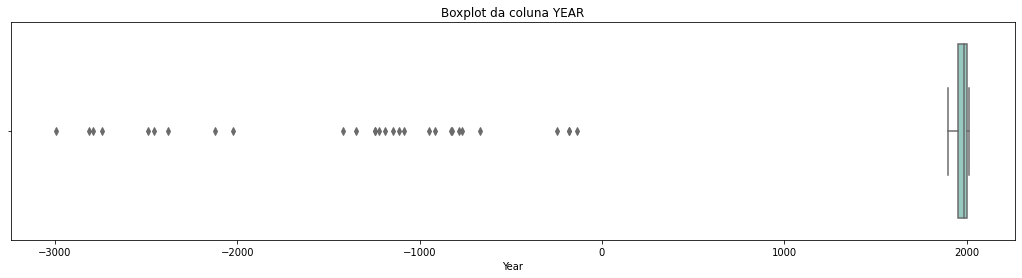

In [173]:
#Vamos plotar um gráfico que ilustre a situação dos valores negativos atribuídos ao ano
plt.figure(figsize=(18,4))
sns.boxplot(x = df["Year"], palette = "Set3")
plt.title("Boxplot da coluna YEAR")
plt.show()

O gráfico acima nos mostra muito bem que esses valores negativos são **outliers** e, nesse caso, podemos ver que também distorcem os valores das idades.
 
**Para resolver isso, vamos descartar esses valores.**

In [174]:
#Descartando os outliers
df = df[df["Year"] > 0]

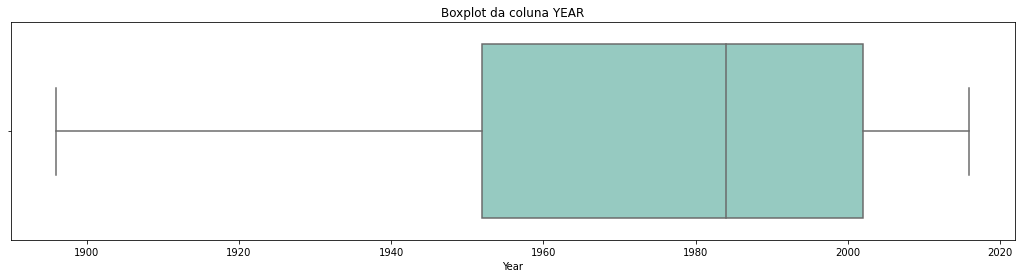

In [175]:
#Novo gráfico boxplot
plt.figure(figsize=(18,4))
sns.boxplot(x = df["Year"], palette = "Set3")
plt.title("Boxplot da coluna YEAR")
plt.show()

Viu como o novo gráfico nos indica resultados bem mais coerentes com o nosso dataset? 

Aqueles outliers prejudicavam bastante a qualidade da nossa análise. Agora, ela pode ser feita de um jeito muito mais satisfatório.

## **4) IDADE (AGE)**

Acabamos nosso tratamento de dados em Year. Vamos para Age. 

Do describe anterior, não pudemos identificar nenhum problema. Vamos ver se há valores nulos, então.

In [176]:
#Verifica se há valores nulos na coluna Age

df["Age"].isnull().sum()

730

Vamos substituir os valores faltantes para Age. Mas pelo quê? 

Utilizar a **mediana** dos valores, nesse caso, é uma solução razoável. Vamos a ela!

In [177]:
#Mediana das idades

df["Age"].median()

25.0

In [178]:
#Substitui os valores nulos pela mediana 

df["Age"] = df["Age"].fillna(df["Age"].median())


In [179]:
#Confere o sucesso da operação anterior

df["Age"].isnull().sum()

0

Vamos tratar da coluna Height. 

Consideremos que o maior atleta do mundo tem 2,46m de altura. 

Veja, abaixo, que dentro desse intervalo, a altura maior é 2.23m. É razoável, portanto, que a tomemos como o limite das alturas dos nossos atletas, pois é o máximo valor menor ou igual a real altura máxima de um atleta.

Qualquer valor acima disso, deverá ser reajustado corretamente.

In [180]:
df[df["Height"] <= 246]["Height"].max()


223.0

In [181]:
#Contagem da quantidade de alturas maiores que a altura máxima 246cm
df.groupby(df["Height"] > 246).count()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Height,,,,,,,,,,,,,,
False,39753,39753,39753,31045,30463,39753,39753,39753,39753,39753,39753,39753,39753,39753
True,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [182]:
#Contagem da quantidade de alturas com dados nulos
df["Height"].isnull().sum()

8708

Vamos tratar os casos nulos e excedentes das nossas alturas!
A técnica de substituir pela mediana também é boa nesse caso.

In [183]:
#Substituindo os valores nulos pela mediana
df["Height"] = df["Height"].fillna(df["Height"].median())
#Substituindo os valores maiores que a altura máxima pela mediana
df.loc[df["Height"] > 246, "Height"] = df["Height"].median()

In [184]:
#Checagem do sucesso do tratamento
df[df["Height"] > 246]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,


## **5) PESO (WEIGHT)**

Agora, tratemos a coluna Weight. Como visto anteriormente, **precisamos transformá-la em float**.

Mas antes disso, vejamos abaixo que, dentre os valores possíveis, há uma string: 'hsuahusahu'.

**Primeiro, ela deve ser transformada em um número** e, após isso, podemos alterar o tipo da nosssa coluna.

In [185]:
#Visualização inicial da coluna Weight - veja que é do tipo objeto

df["Weight"].describe()

count     30485
unique      185
top        70.0
freq       1227
Name: Weight, dtype: object

In [186]:
#Valores únicos de Weight - veja que há um incompatível com o que esperamos

df["Weight"].unique()

array([nan, '85.0', '64.0', '90.0', '87.0', '49.0', 'hsuahusahu', '83.0',
       '86.0', '82.0', '55.0', '67.0', '60.0', '79.0', '96.0', '97.0',
       '70.0', '88.0', '56.0', '80.0', '59.0', '91.0', '72.0', '62.0',
       '63.0', '104.0', '84.0', '125.0', '50.0', '102.0', '48.0', '58.0',
       '78.0', '40.0', '68.0', '92.0', '75.0', '61.0', '89.0', '65.0',
       '93.0', '77.0', '46.0', '81.0', '52.0', '73.0', '54.0', '57.0',
       '69.0', '99.0', '95.0', '51.0', '120.0', '74.0', '110.0', '100.0',
       '76.0', '66.0', '47.0', '69.5', '107.0', '53.0', '45.0', '105.0',
       '109.0', '156.0', '71.0', '130.0', '98.0', '160.0', '106.0',
       '146.0', '44.0', '141.0', '118.0', '101.0', '94.0', '74.5',
       '121.0', '135.0', '111.0', '39.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '116.0', '108.0', '35.0', '117.0',
       '103.0', '58.5', '32.0', '113.0', '146.5', '116.5', '140.0',
       '115.0', '38.0', '101.5', '154.0', '136.0', '127.0', '102.5',

In [187]:
#Troca "hsuahusahu" pela moda

df["Weight"].replace("hsuahusahu", df["Weight"].mode()[0], inplace = True)

In [188]:
#Checa o sucesso da operação anterior

df[df["Weight"] == "hsuahusahu"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,


In [189]:
#Transforma os dados de Weight em float

df["Weight"] = df["Weight"].astype(float)

In [190]:
#Checa o sucesso da operação anterior - o tipo de dado é, de fato, float

df["Weight"].describe()

count    30485.000000
mean        73.849478
std         14.914509
min         28.000000
25%         63.000000
50%         73.000000
75%         83.000000
max        182.000000
Name: Weight, dtype: float64

In [191]:
#Quantidade de valores nulos em Weight

df["Weight"].isnull().sum()

9290

In [192]:
#Substitui os valores nulos pela mediana

df["Weight"].fillna(df["Weight"].median(), inplace = True)

In [193]:
#Checa o sucesso da operação anterior

df["Weight"].isnull().sum()

0

## **6) CIDADE (CITY)**

In [194]:
#Verifica os valores únicos da coluna City
df["City"].unique()

array(['Paris', 'Antwerpen', 'Sochi', 'London', 'Helsinki', 'Albertville',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Oslo',
       'Squaw Valley', 'Stockholm', 'Melbourne', 'Rio de Janeiro',
       'Sydney', 'Atlanta', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Seoul', 'Roma', 'Tokyo', 'Munich',
       'Chamonix', 'St. Louis', 'Sankt Moritz', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Sapporo', 'Lake Placid',
       'Sarajevo', 'Mexico City', 'Garmisch-Partenkirchen', 'Nagano',
       "Cortina d'Ampezzo", 'Innsbruck', '######'], dtype=object)

In [195]:
#Primeira visualização dos valores estranhos na coluna City

df[df["City"] == "######"] 

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
5815,"Gillian ""Jill"" Atkins",FEMALE,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,######,Hockey,Hockey Women's Hockey,Bronze
7903,Jane Louise Barkman (-Brown),FEMALE,17.0,169.0,61.0,United States,USA,1968 Summer,1968,Summer,######,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
10360,Liubov Ivanivna Berezhna-Odynokova,FEMALE,20.0,167.0,61.0,Soviet Union,URS,1976 Summer,1976,Summer,######,Handball,Handball Women's Handball,Gold
10955,Annemieke Marileen Bes,FEMALE,30.0,177.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,######,Sailing,Sailing Women's Three Person Keelboat,Silver
11671,"Suzanne Brigit ""Sue"" Bird",FEMALE,35.0,175.0,66.0,United States,USA,2016 Summer,2016,Summer,######,Basketball,Basketball Women's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130696,Venus Ebony Starr Williams,FEMALE,20.0,185.0,75.0,United States,USA,2000 Summer,2000,Summer,######,Tennis,Tennis Women's Doubles,Gold
131311,Jenny Wolf (-Lotze),FEMALE,31.0,172.0,75.0,Germany,GER,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's 500 metres,Silver
131657,Katarzyna Bronisawa Woniak,FEMALE,20.0,173.0,61.0,Poland,POL,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),Bronze


Dentre os valores de City, temos "#####", que é estranho ao conteúdo do nosso dataset. 

A partir da tabela acima, podemos ver que não é possível estabelecer nenhuma relação entre os valores desconhecidos e as demais colunas. Ou seja, não é possível inferir o nome de cada cidade, ainda que saibamos as demais informações de cada atleta.

Como, nesse caso, o valor desconhecido representa menos de 0.3% da quantidade total dos dados, podemos afirmar que seu descarte não afetará negativamente uma futura análise.

Então, vamos **dropar** esses valores!

In [196]:
#Dropando os valores inválidos

df.drop(df.loc[df["City"] == "######"].index, inplace = True)

In [197]:
#Checa o sucesso da operação anterior

df[df["City"] == "######"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,


## **7) ESTAÇÃO DO ANO (SEASON)**

In [198]:
#Verifica os valores únicos de Season
df["Season"].unique()

array(['Summer', 'Winter', '#ForaBolsonaro', 'Ele nunca', 'Ele não'],
      dtype=object)

In [199]:
#Troca Ele nunca pela respectiva Season
df.loc[(df["Games"].str.contains("Summer")) & (df["Season"] == "Ele nunca"), "Season"] = "Summer"
df.loc[(df["Games"].str.contains("Winter")) & (df["Season"] == "Ele nunca"), "Season"] = "Winter"

In [200]:
#Troca Ele não pela respectiva Season
df.loc[(df["Games"].str.contains("Summer")) & (df["Season"] == "Ele não"), "Season"] = "Summer"
df.loc[(df["Games"].str.contains("Winter")) & (df["Season"] == "Ele não"), "Season"] = "Winter"

In [201]:
df[df["Season"] == "#ForaBolsonaro"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4359,va Angyal,FEMALE,21.0,163.0,63.0,#ForaBolsonaro,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
6299,Yelena Yuryevna Azarova,FEMALE,31.0,165.0,64.0,#ForaBolsonaro,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
9250,Gudrun Beckmann,FEMALE,17.0,174.0,62.0,#ForaBolsonaro,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
11047,"Janice ""Jan"" Betker",FEMALE,37.0,167.0,64.0,#ForaBolsonaro,CAN,1998 Winter,1998,#ForaBolsonaro,Nagano,Curling,Curling Women's Curling,Gold
12054,Bonnie Kathleen Blair (-Cruikshank),FEMALE,29.0,165.0,59.0,#ForaBolsonaro,USA,1994 Winter,1994,#ForaBolsonaro,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Gold
14614,Colette Brand (-Roth),FEMALE,30.0,164.0,50.0,#ForaBolsonaro,SUI,1998 Winter,1998,#ForaBolsonaro,Nagano,Freestyle Skiing,Freestyle Skiing Women's Aerials,Bronze
14990,Grit Breuer (-Springstein),FEMALE,24.0,168.0,63.0,#ForaBolsonaro,GER,1996 Summer,1996,#ForaBolsonaro,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
20013,Anne-Caroline Stphanie Chausson,FEMALE,30.0,172.0,64.0,#ForaBolsonaro,FRA,2008 Summer,2008,#ForaBolsonaro,Beijing,Cycling,Cycling Women's BMX,Gold
20129,Adriana Chelariu-Bazon,FEMALE,21.0,181.0,81.0,#ForaBolsonaro,ROU,1984 Summer,1984,#ForaBolsonaro,Los Angeles,Rowing,Rowing Women's Coxed Eights,Silver


In [202]:
df[df["Team"] == "#ForaBolsonaro"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4359,va Angyal,FEMALE,21.0,163.0,63.0,#ForaBolsonaro,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
6299,Yelena Yuryevna Azarova,FEMALE,31.0,165.0,64.0,#ForaBolsonaro,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
9250,Gudrun Beckmann,FEMALE,17.0,174.0,62.0,#ForaBolsonaro,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
11047,"Janice ""Jan"" Betker",FEMALE,37.0,167.0,64.0,#ForaBolsonaro,CAN,1998 Winter,1998,#ForaBolsonaro,Nagano,Curling,Curling Women's Curling,Gold
12054,Bonnie Kathleen Blair (-Cruikshank),FEMALE,29.0,165.0,59.0,#ForaBolsonaro,USA,1994 Winter,1994,#ForaBolsonaro,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Gold
14614,Colette Brand (-Roth),FEMALE,30.0,164.0,50.0,#ForaBolsonaro,SUI,1998 Winter,1998,#ForaBolsonaro,Nagano,Freestyle Skiing,Freestyle Skiing Women's Aerials,Bronze
14990,Grit Breuer (-Springstein),FEMALE,24.0,168.0,63.0,#ForaBolsonaro,GER,1996 Summer,1996,#ForaBolsonaro,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
20013,Anne-Caroline Stphanie Chausson,FEMALE,30.0,172.0,64.0,#ForaBolsonaro,FRA,2008 Summer,2008,#ForaBolsonaro,Beijing,Cycling,Cycling Women's BMX,Gold
20129,Adriana Chelariu-Bazon,FEMALE,21.0,181.0,81.0,#ForaBolsonaro,ROU,1984 Summer,1984,#ForaBolsonaro,Los Angeles,Rowing,Rowing Women's Coxed Eights,Silver


Percebemos que todas as colunas Season com #ForaBolsonaro estão relacionadas a colunas Team com o mesmo valor.

Ainda que possamos inferir os valores corretos para cada Season a partir de Games, não conseguimos inferir, por outro lado, o valor da coluna Team.

Nesse caso, para que nosso dataset continue coerente e, da mesma forma, nossa análise também, uma alternativa é dropar os #ForaBolsonaro.

In [203]:
#Dropando os #ForaBolsonaro

df = df[df["Season"] != "#ForaBolsonaro"]

In [204]:
#Conferindo o sucesso da operação anterior

df["Season"].unique()

array(['Summer', 'Winter'], dtype=object)

## **GRÁFICOS**

Feita a limpeza dos dados, vamos analisar nosso dataset.

Um primeiro passo é construir um mapa de calor para entender melhor qual a relação entre os dados que temos em mãos.

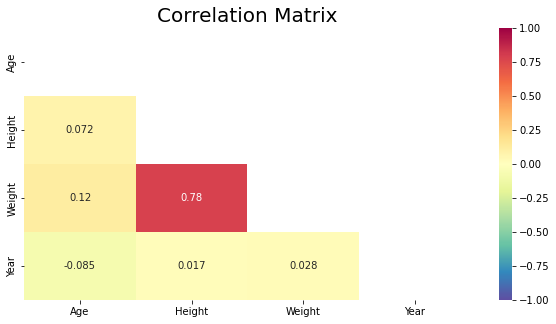

In [205]:
#Criação do heatmap

plt.figure(figsize=(10,5))
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, vmin=-1, vmax=1, mask = mask, cmap='Spectral_r')
plt.title('Correlation Matrix',  fontsize = 20, color = 'black')
plt.show()

A matriz de correlação acima informa que as colunas com maior correlação são as de peso (Weight) e de altura (Height). 

Em seguida, temos peso e idade (Age). 

Isso ocorre por razões bastante óbvias e, por conta disso, não vamos nos debruçar sobre esses dados.

Vamos buscar, então, por relações entre os demais dados do dataset. Para isso, seguiremos a seguinte lógica:

1. Fazer uma análise geral das Olímpiadas quanto a alguns critérios (e tirar conclusões disso);
2. Fazer uma análise segundo o critério Sexo;
3. Fazer uma análise dos atletas mais medalhistas e outra segundo o critério Esporte.

### **ANÁLISE GERAL (INVERNO x VERÃO)**

[]

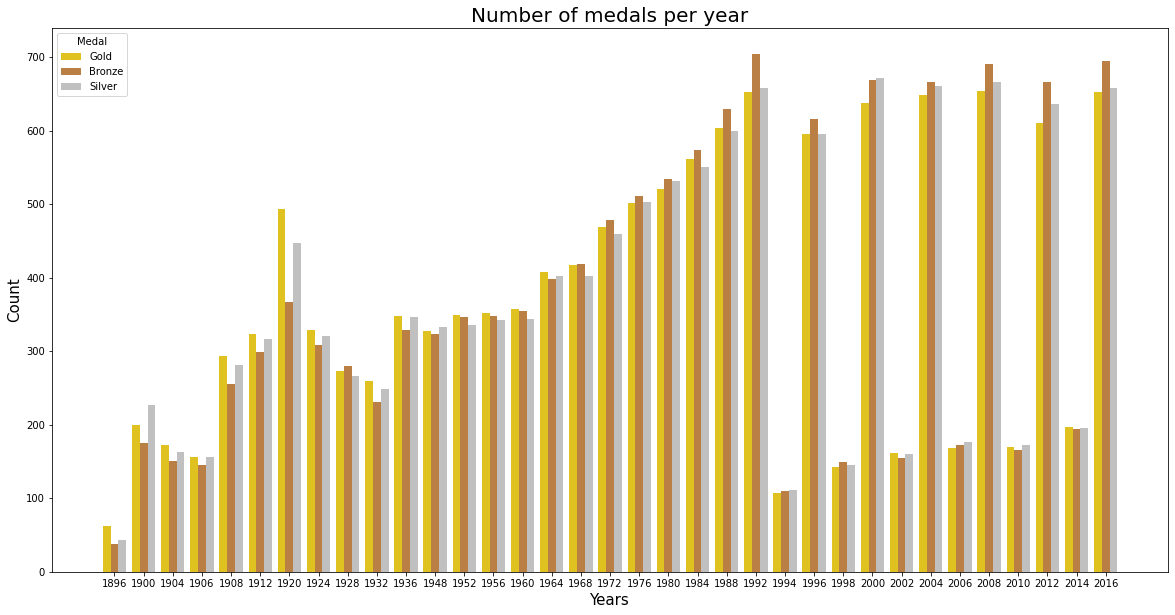

In [206]:
plt.subplots(figsize = (20,10))
my_palette = {'Gold': 'gold','Silver': 'silver', 'Bronze': '#cd7f32' }
sns.countplot(x= "Year", hue= 'Medal', data= df , palette= my_palette);
plt.xlabel('Years', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Number of medals per year', fontsize = 20, color = 'black')
plt.plot()

Uma análise do gráfico acima permite concluir que, no geral, a quantidade de medalhistas aumenta com o passar dos anos. Isso pode ser explicado razoavelmente por uma maior participação de atletas e um aumento de eventos nas Olímpiadas.

Também podemos ver que a quantidade de medalhistas de ouro sempre é maior que a dos demais. Quanto à distribuição das medalhas, dentre suas categorias, basta essa análise.

Por fim, é notório que há alguns casos que saltam aos olhos. Por exempo, a diferença gritante entre a quantidade de medalhas entre os Jogos de 1992 e 1994, 2008 e 2010 ou 2012 e 2014. Isso pode estar relacionado à estação em que ocorrem as Olímpiadas. 

Muito provavelmente, nas de Inverno, poucos atletas e comitês participem, enquanto, nas de Verão, há um salto expressivo de participantes e maior variedade de eventos. Dessa forma, temos menos medalhas a serem entregues no Inverno e mais no Verão.

Vamos analisar essas diferenças mais para frente e atestar se essa hipótese está correta!

[]

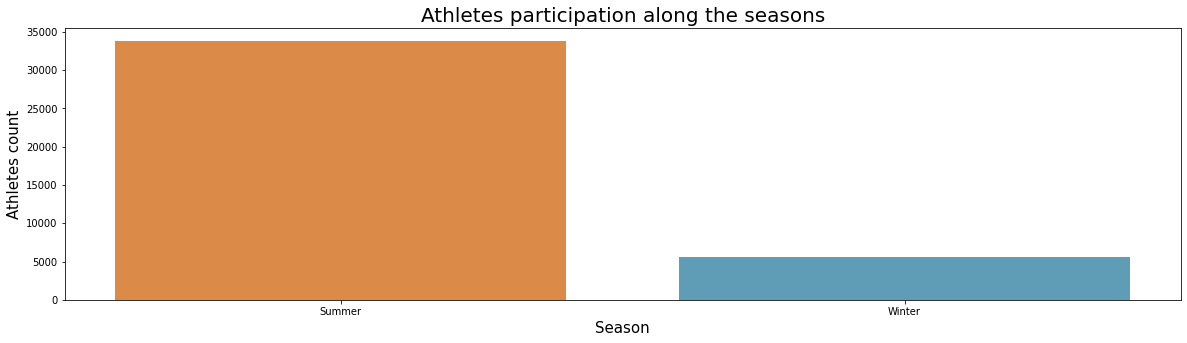

In [207]:
season = df["Season"].value_counts()
plt.subplots(figsize = (20,5))
my_palette = {"Summer": "#F3872F", "Winter": "#50A3C6"}
sns.barplot(x=season.index, y=season, palette = my_palette)
plt.xlabel('Season', fontsize = 15, color = 'black')
plt.ylabel('Athletes count', fontsize = 15, color = 'black')
plt.title('Athletes participation along the seasons', fontsize = 20, color = 'black')
plt.plot()

O gráfico acima apresenta o que já era esperado: no Inverno, a participação nos Jogos é bem menor que no Verão. 

É nítido que essa diferença ocorre por conta da questão climática, o que reflete também na quantidade de modalidades disputadas.

[]

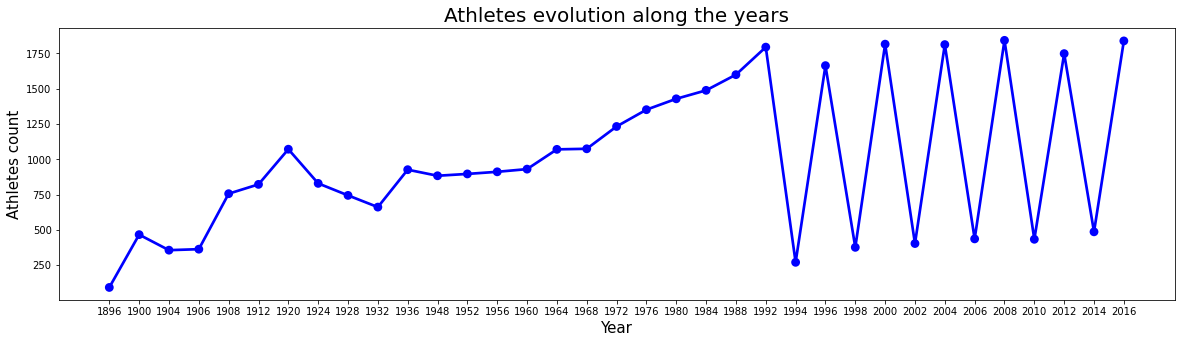

In [208]:
newData = df.groupby("Year").agg({"Name": pd.Series.nunique}).reset_index()

plt.subplots(figsize = (20,5))
sns.pointplot(data = newData, x= "Year", y = "Name",  color= "blue");
plt.xlabel('Year', fontsize = 15, color = 'black')
plt.ylabel('Athletes count', fontsize = 15, color = 'black')
plt.title('Athletes evolution along the years', fontsize = 20, color = 'black')
plt.plot()

O gráfico acima informa a evolução da participação de atletas ao longo dos anos.

Em um primeiro momento, pode-se constatar que, no geral, conforme o passar dos anos, essa quantidade aumenta, como esperávamos. É esperado, então, que o mesmo gráfico, em relação aos Comitês participantes, seja bastante parecido com esse.

Outro ponto de destaque são os anos dos Jogos de Inverno. Mais uma vez, percebemos que são justamente eles que têm a menor participação de atletas.

Novamente, há casos especiais que podem ser explicados por fatores históricos, o que justificaria sua não inserção no padrão visto.

Os anos iniciais do século XX corresponde ao período de consolidação do formato das Olímpiadas como temos atualmente, o que explica a baixa participação de atletas, com alguns altos e baixos.

O trecho decrescente nos anos 20 e 30 correspondem às Olímpiadas que ocorrem em meio a Grande Depressão e a Crise de 29, o que afetou profundamente os ânimos das pessoas e a economia de todos os países. Por conta disso, houve baixa adesão aos Jogos.

Após 12 anos de interrupção (devido à Segunda Guerra Mundial), os Jogos Olímpicos voltam em 1948, porém, em um cenário bastante afetado pelos acontecimentos anteriores. Novamente, vemos uma queda na participação.

Em 1956, temos o início da Guerra Fria e a ocorrência de conflitos políticos internacionais (alguns armados até). Atribui-se a essa época os primeiros boicotes às Olímpiadas. 

Esses exemplos bastam para concluir que a história das Olímpiadas é feita de altos e baixos, sendo que a ocorrência dos Jogos é bastante influenciada pelo contexto de seu tempo e da sociedade contemporânea à ela. Isso, somado à questão das estações do ano, explica alguns momentos de baixa ou alta participação, em contraste ao padrão de crescente participação que se nota no comportamento da curva.

[]

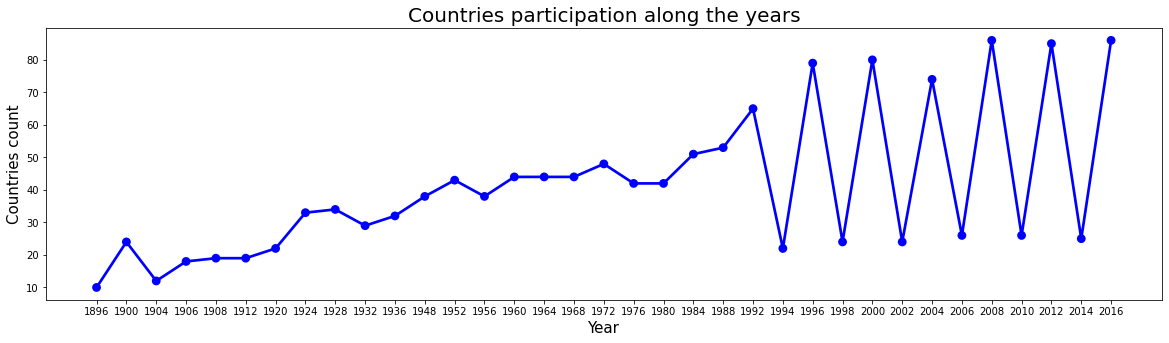

In [209]:
newData = df.groupby("Year").agg({"NOC": pd.Series.nunique}).reset_index()

plt.subplots(figsize = (20,5))
sns.pointplot(data = newData, x= "Year", y = "NOC",  color= "blue");
plt.xlabel('Year', fontsize = 15, color = 'black')
plt.ylabel('Countries count', fontsize = 15, color = 'black')
plt.title('Countries participation along the years', fontsize = 20, color = 'black')
plt.plot()

O gráfico acima está em conssonância com o anterior e apresenta o comportamento que imaginávamos para ele.

Alguns pontos se destacam nessa curva em relação à anterior e vamos falar de um bem importante.

Em 1984, temos, de fato, um crescimento singular da quantidade de países participantes. Em meio à Guerra Fria, isso pode ser explicado por uma série de manobras políticas realizadas pelos EUA para garantir o sucesso da edição, a qual foi boicotada pela União Soviética e outros países. A tentativa da URSS claramente deu errado, visto que mais países participaram dessa edição, sendo que, inclusive, essa é a primeira participação da China no evento em toda a história.

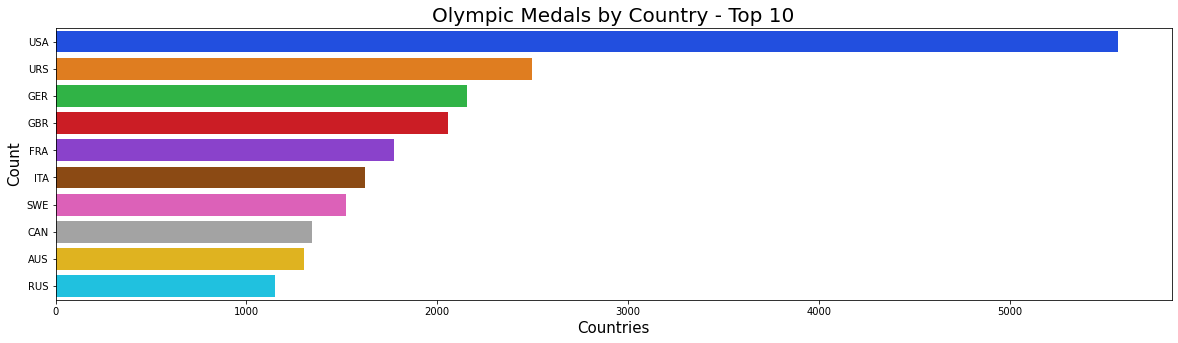

In [210]:
countries = list(df['NOC'].unique())
medal_counts = []
for i in countries:
    x = df[df['NOC'] == i]
    medalCount = len(x)
    medal_counts.append(medalCount)

newData = pd.DataFrame({'countries': countries,'medal_counts':medal_counts})
new_index = (newData['medal_counts'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data.head(10)

plt.figure(figsize = (20,5))
sns.barplot(y = sorted_data['countries'], x = sorted_data['medal_counts'], palette= "bright")
plt.xlabel('Countries', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Olympic Medals by Country - Top 10', fontsize = 20, color = 'black')
plt.show()

O gráfico de barras acima nos indica a distribuição de medalhas olímpicas por país, em um Top 10, considerando todo o período de tempo do nosso dataset.

O primeiro e o segundo lugar ficam com os Estados Unidos e a União Soviética, respectivamente e como era esperado. O resultado não poderia ser outro considerando que os dados se referem principalmente aos Jogos durante o século XX, marcado pela competição, inclusive esportiva, entre esses países.

Em seguida, o Top 10 é completado apenas por países desenvolvidos (Canadá e europeus). A ausência de países latinos e africanos é algo que chama bastante a atenção nesse caso. 

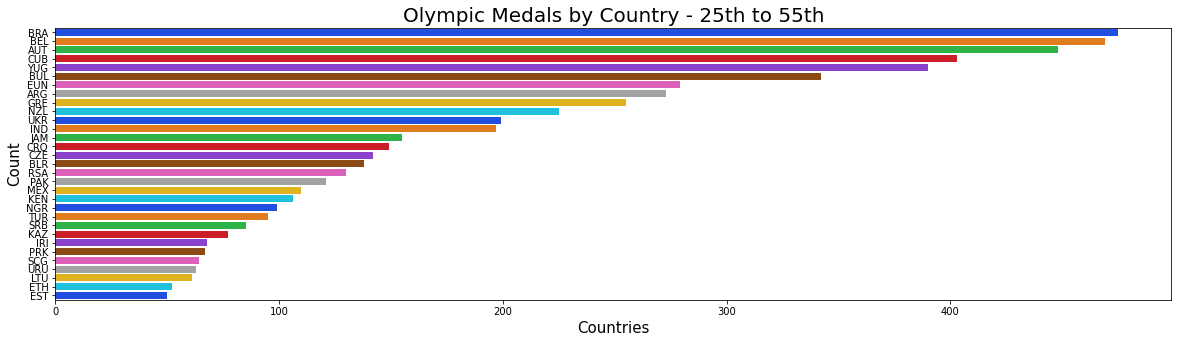

In [227]:
countries = list(df['NOC'].unique())
medal_counts = []
for i in countries:
    x = df[df['NOC'] == i]
    medalCount = len(x)
    medal_counts.append(medalCount)

newData = pd.DataFrame({'countries': countries,'medal_counts':medal_counts})
new_index = (newData['medal_counts'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data[25:56]

plt.figure(figsize = (20,5))
sns.barplot(y = sorted_data['countries'], x = sorted_data['medal_counts'], palette= "bright")
plt.xlabel('Countries', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Olympic Medals by Country - 25th to 55th', fontsize = 20, color = 'black')
plt.show()

Alterando o intervalo da lista de países, podemos obter o gráfico acima.

Perceba que o Brasil está na 25ª posição apenas. Somente a partir dessa posição, encontramos países latinos, como Cuba, Argentina e Jamaica. 
Países africanos, como a África do Sul, o Quênia e a Nigéria, estão perto da quadragésima posição.

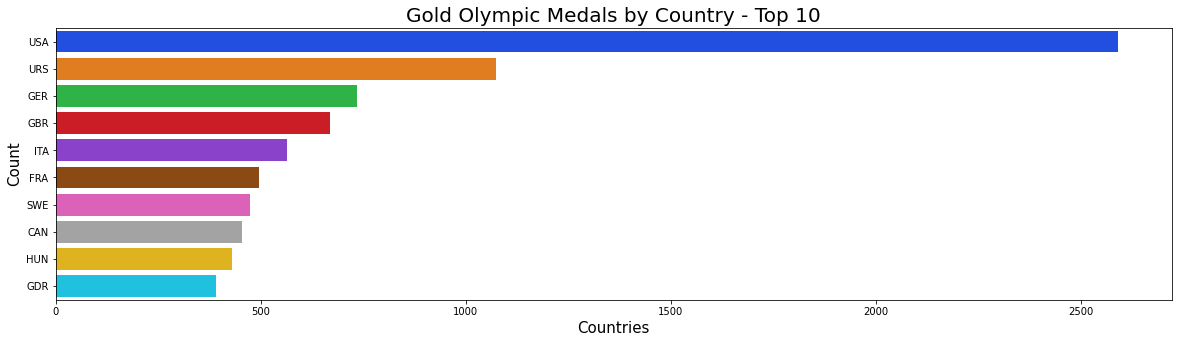

In [212]:
countries = list(df['NOC'].unique())
medal_counts = []
for i in countries:
    x = df[df['NOC'] == i]
    medalCount = len(x[x["Medal"] == "Gold"])
    medal_counts.append(medalCount)

newData = pd.DataFrame({'countries': countries,'medal_counts':medal_counts})
new_index = (newData['medal_counts'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data.head(10)

plt.figure(figsize = (20,5))
sns.barplot(y = sorted_data['countries'], x = sorted_data['medal_counts'], palette= "bright")
plt.xlabel('Countries', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Gold Olympic Medals by Country - Top 10', fontsize = 20, color = 'black')
plt.show()

O gráfico acima nos indica distribuição de medalhas de ouro entre os comitês olímpicos. O cenário não surpreende. Mais uma vez, é liderado pelos países desenvolvidos.

Diante de tudo o que vimos até agora, especialmente os últimos gráficos, é possível afirmar que há uma disparidade profunda entre a participação e a conquista dos países mais desenvolvidos e os que são periféricos, em qualquer quesito positivo, como medalhas obtidas, por exemplo.

É esperado que vejamos essa tendência de distribuição desigual se repetir para outras análises também.

Mas será que essa diferença de posições, por exemplo, pode ser explicada? 

Por que países mais desenvolvidos têm mais medalhas (geral e ouro) e os países periféricos possuem menos?

### **SEXO**

[]

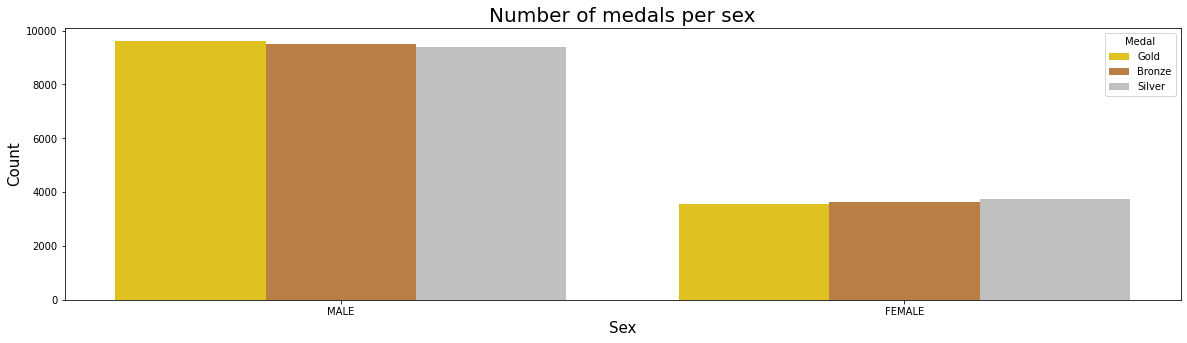

In [213]:
plt.subplots(figsize = (20,5))
my_palette = {'Gold': 'gold','Silver': 'silver', 'Bronze': '#cd7f32' }
sns.countplot(x= "Sex", hue= 'Medal', data= df , palette= my_palette);
plt.xlabel('Sex', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Number of medals per sex', fontsize = 20, color = 'black')
plt.plot()

O gráfico acima nos apresenta a distribuição de medalhas segundo critérios de sexo.

A diferença entre medalhas dadas aos homens e as dadas às mulheres e bastante significativa. Enquanto os homens somam quase 10 mil medalhas de ouro apenas, as mulheres não atingem sequer 5 mil medalhas da mesma categoria.

É claro que essa disparidade pode ser explicada por várias questões sociais. Por exemplo, nem sempre as mulheres puderam participar dos Jogos Olímpicos. É óbvio, então, que elas tenham menos medalhistas, já que não tiveram a mesma oportunidade de participação.

Vamos entender um pouco da participação das mulheres nos Jogos ao longo do tempo?

[]

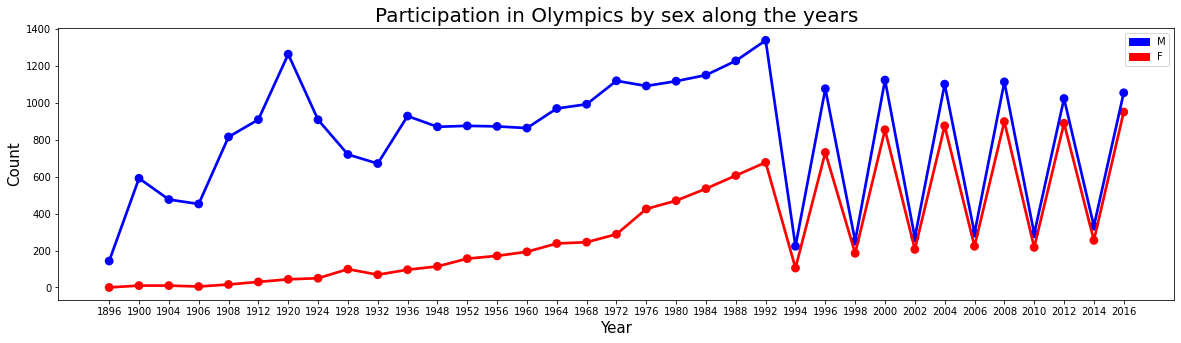

In [214]:
years = list(df["Year"].unique())
M = []
F = []

for i in years:
    x = df[df["Year"] == i]
    male = len(x[x["Sex"] == "MALE"])
    M.append(male)
    female = len(x[x["Sex"] == "FEMALE"])
    F.append(female)


plt.subplots(figsize = (20,5))
sns.pointplot(x= years, y = M,  color= "blue", label = 'Male');
sns.pointplot(x= years, y = F,  color= "red", label = 'Female');
male_patch = mpatches.Patch(color='blue', label='M')
female_patch = mpatches.Patch(color='red', label='F')
plt.legend(handles=[male_patch, female_patch])
plt.xlabel('Year', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Participation in Olympics by sex along the years', fontsize = 20, color = 'black')
plt.plot()

Como esperávamos, nos anos iniciais, a participação das mulheres rodeia zero. Inclusive, em 1896, a primeira edição dos Jogos Modernos, não houve atletas mulheres!

Com o tempo, esse número aumenta gradativamente. Isso, com certeza, se deve às mudanças sociais decorrentes da luta das mulheres em todo o mundo.

Vemos também que, assim como os homens, as mulheres também participam menos durante os Jogos de Inverno.

A maior participação das mulheres foi em 2016, representando quase 50% do total de atletas, sendo essa, portanto, também a edição com mais igualdade entre os sexos. 

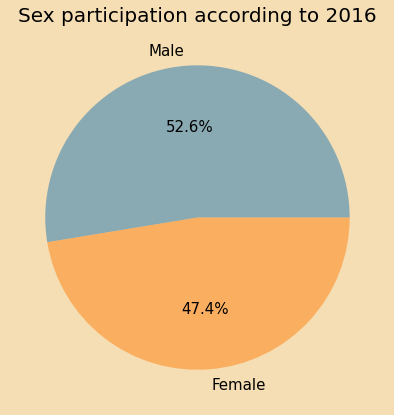

In [215]:
year2016 = df[df["Year"] == 2016]
fig, ax = plt.subplots(figsize = (7,7))
ax.grid(False)
plt.title('Sex participation according to 2016', color = 'black', fontsize = 20)
plt.pie(year2016['Sex'].value_counts(), wedgeprops={'alpha':0.5}, autopct='%1.1f%%', labels = ["Male", "Female"], textprops={'fontsize': 15})
fig.set_facecolor('wheat')
plt.show()

O gráfico de pizza acima indica que a participação das mulheres chegou bem perto da metade em relação ao total de atletas. Isso confirma a hipótese anterior, quando comparado ao gráfico de evolução, que a edição com a maior participação das mulheres foi a mais recente do nosso dataset, o que também é coerente com a evolução da história mundial.

No entanto, os atletas homens dominam ainda as Olímpiadas em termos de participação.

[]

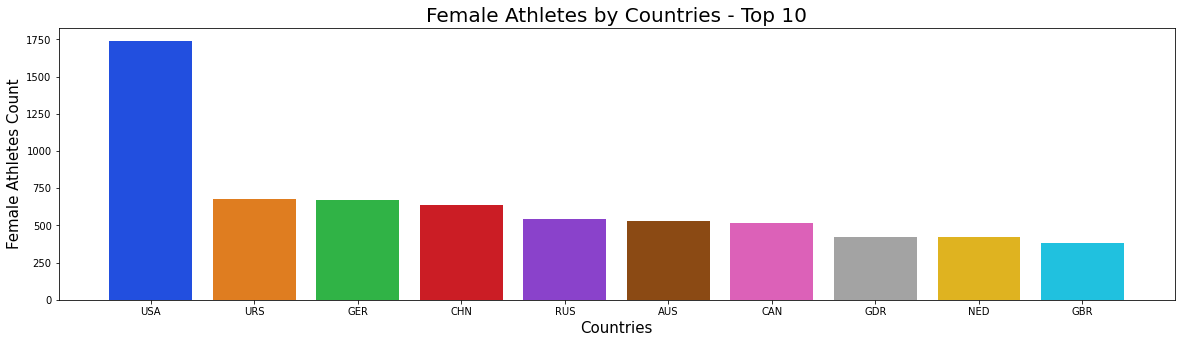

In [216]:
countries = list(df["NOC"].unique())
F = []

for i in countries:
    x = df[df["NOC"] == i]
    female = len(x[x["Sex"] == "FEMALE"])
    F.append(female)

newData = pd.DataFrame({'countries': countries,'female athletes':F})
new_index = (newData['female athletes'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index).head(10)

plt.subplots( figsize = (20,5))
sns.barplot( x= sorted_data['countries'], y = sorted_data['female athletes'], palette = "bright")
plt.xlabel('Countries', fontsize = 15, color = 'black')
plt.ylabel('Female Athletes Count', fontsize = 15, color = 'black')
plt.title('Female Athletes by Countries - Top 10', fontsize = 20, color = 'black')
plt.plot()

O gráfico acima apresenta o Top 10 dos países com mais atletas medalhistas mulheres. Vamos finalizar nossa análise segundo o critério de Sexo com esse gráfico.

Mais uma vez, o cenário é dominado pelos países desenvolvidos, sendo que EUA, URSS e Alemanha dominam o pódio.

Como estamos tratando todo o período Moderno das Olímpiadas, é de se esperar que hajam duas categorias diferentes: uma para a URSS (que já não mais existe) e outra para a Rússia (RUS); ou até mesmo uma para a Alemanha Oriental (GDR) e outra para a Alemanha (GER), do tempo presente.

Destaque para países como China e Países Baixos, que aparecem nesse gráfico, ainda que não tenham tido posição de destaque no gráfico de países mais medalhistas, por exemplo. Apesar disso, alguns conhecidos desse gráfico reaparecem aqui, como Canadá, Grã-Bretanha, Áustria, EUA e Alemanha.

[]

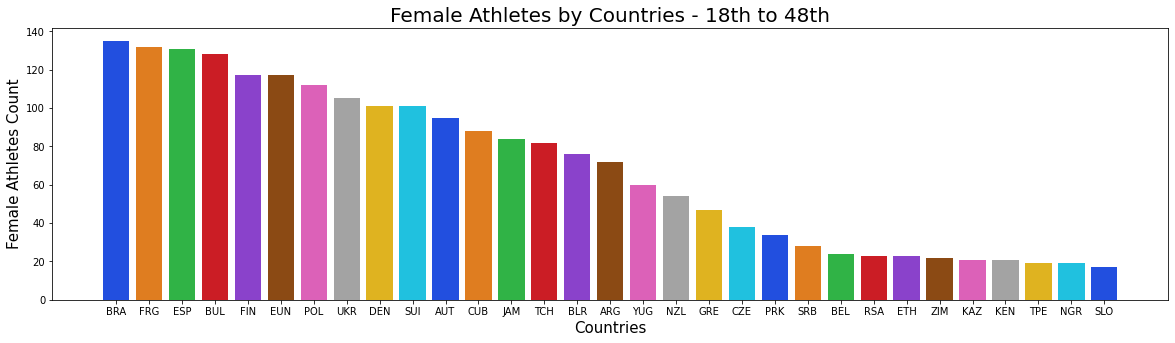

In [225]:
countries = list(df["NOC"].unique())
F = []

for i in countries:
    x = df[df["NOC"] == i]
    female = len(x[x["Sex"] == "FEMALE"])
    F.append(female)

newData = pd.DataFrame({'countries': countries,'female athletes':F})
new_index = (newData['female athletes'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data[18:49]

plt.subplots( figsize = (20,5))
sns.barplot( x= sorted_data['countries'], y = sorted_data['female athletes'], palette = "bright")
plt.xlabel('Countries', fontsize = 15, color = 'black')
plt.ylabel('Female Athletes Count', fontsize = 15, color = 'black')
plt.title('Female Athletes by Countries - 18th to 48th', fontsize = 20, color = 'black')
plt.plot()

Dessa vez, o Brasil aparece na 18ª posição. 

No entanto, países latinos tornam-se destaque apenas a partir da posição brasileira. Países africanos em posições semelhantes às do gráfico de medalhas por país (41ª com a África do Sul).

Será que a diferença existente entre países desenvolvidos e periféricos também se reflete nas questões de sexo? Por que mulheres europeias e norte-americanas têm maior participação nos espotes do que as latinas e africanas, por exemplo?

### **ATLETAS MAIS MEDALHISTAS E ESPORTES**

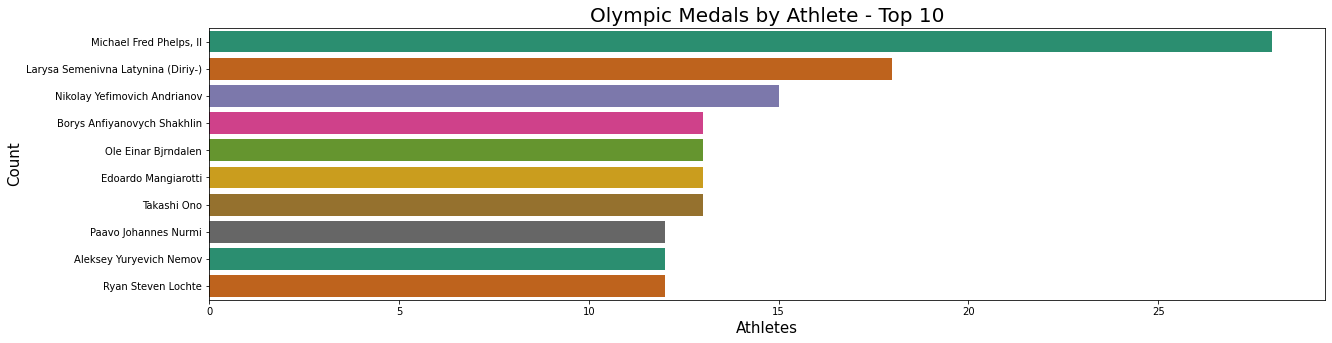

In [228]:
athletes = list(df["Name"].unique())
medal_counts = []
for i in athletes:
    x = df[df["Name"] == i]
    medalCount = len(x)
    medal_counts.append(medalCount)

newData = pd.DataFrame({'athletes': athletes,'medal_counts':medal_counts})
new_index = (newData['medal_counts'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data.head(10)

plt.figure(figsize = (20,5))
sns.barplot(y = sorted_data['athletes'], x = sorted_data['medal_counts'], palette= "Dark2")
plt.xlabel('Athletes', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.title('Olympic Medals by Athlete - Top 10', fontsize = 20, color = 'black')
plt.show()

No gráfico acima, temos o Top 10 dos atletas mais medalhistas da história das Olímpiadas.

Destaque para o primeiro lugar: o lendário Michael Phelps, da Natação, representando os EUA. Em seguida, temos 3 atletas soviéticos liderando o nosso Top 10. Novamente, esse resultado não poderia ser diferente, devido às questões já levantadas anteriormente a respeito das disputas entre os dois países.

Passamos a Ole Einar, norueguês; Edoardo Mangiarotti, italiano; Takashi Ono, japonês; Paavo Johannes Nurmi, finlandês; Aleksey é russo e Ryan estadunidense.

Temos, no total, 2 atletas dos EUA contra 4 da URSS. Vemos, que o conflito acirrado entre ambos marca nosso Top 10 mais uma vez, deixando espaço aberto apenas para atletas de países desenvolvidos (como esperado novamente).

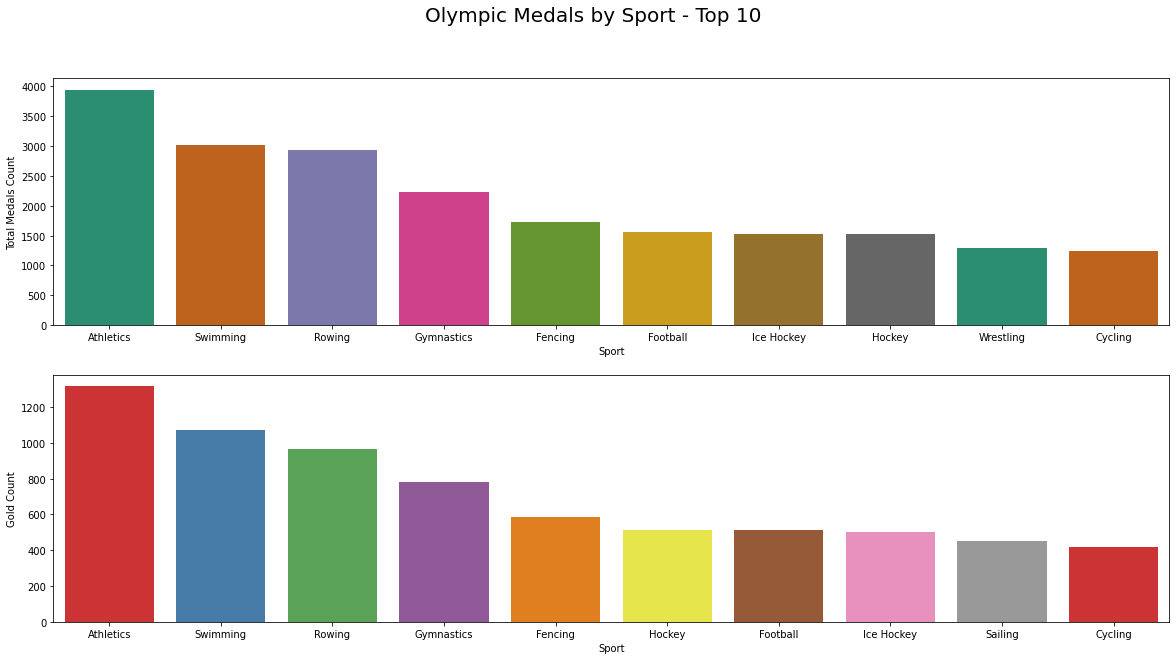

In [229]:
sports = list(df["Sport"].unique())
medal_counts = []
gold_counts=[]
for i in sports:
    x = df[df["Sport"] == i]
    medalCount = len(x)
    medal_counts.append(medalCount)
    gold = len(x[x["Medal"] == "Gold"])
    gold_counts.append(gold)


newData = pd.DataFrame({'Sport': sports,'Total Medals Count':medal_counts})
new_index = (newData['Total Medals Count'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)
sorted_data = sorted_data.head(10)

newData1 = pd.DataFrame({'Sport': sports,'Gold Count':gold_counts})
new_index1 = (newData1['Gold Count'].sort_values(ascending=False)).index.values
sorted_data1 = newData1.reindex(new_index1)
sorted_data1 = sorted_data1.head(10)

fig, axes = plt.subplots(2, 1, figsize = (20,10))
sns.barplot(ax = axes[0],x = sorted_data['Sport'], y = sorted_data['Total Medals Count'], palette= "Dark2")
sns.barplot(ax = axes[1],x = sorted_data1['Sport'], y = sorted_data1['Gold Count'], palette= "Set1")

fig.suptitle('Olympic Medals by Sport - Top 10', fontsize = 20, color = 'black')
plt.show()

Temos dois gráficos acima. O superior indica o Top 10 Esportes Medalhistas e o inferior o Top 10 Esportes Medalhistas de Ouro.

Atletismo e Natação ocupam, respectivamente, a primeira e a segunda posições de ambos. Isso pode ocorrer, talvez, por conta dos dois esportes terem uma quantidade de provas bastante significativa, superando, no geral, a dos demais, como futebol, por exemplo, considerando que, dessa forma, competem mais atletas também.

Em seguida, temos Remo, Ginástica e Esgrima, nessa ordem. Hóquei e Ciclismo trocam suas posições de um para outro.

É importante notar que alguns países novos aparecem no segundo gráfico. Hóquei de Gelo e Vela, por exemplo, entram no Top 10 de medalhistas de Ouro, mas não no quadro geral. Por outro lado, Luta livre, que é o nono colocado dentre os medalhistas gerais, não aparece como um medalhista de ouro no Top 10.

Além disso, ao comparar os dois gráficos, percebemos que as medalhas de ouro por si só representam uma parcela bastante expressiva do total de medalhas conquistadas para cada esporte. É razoável, então, pensar que esses esportes ganham mais ouro, no geral, do que medalhas de prata e de bronze.

Um último pensamento bem interessante é que esportes mais tradicionais e populares, como Basquete, Vôlei, etc., não aparecem em nenhum dos rankings. O único que aparece é Futebol, mas, ainda assim, em uma posição menor do que se esperaria para esse esporte, dada a sua fama e popularidade.

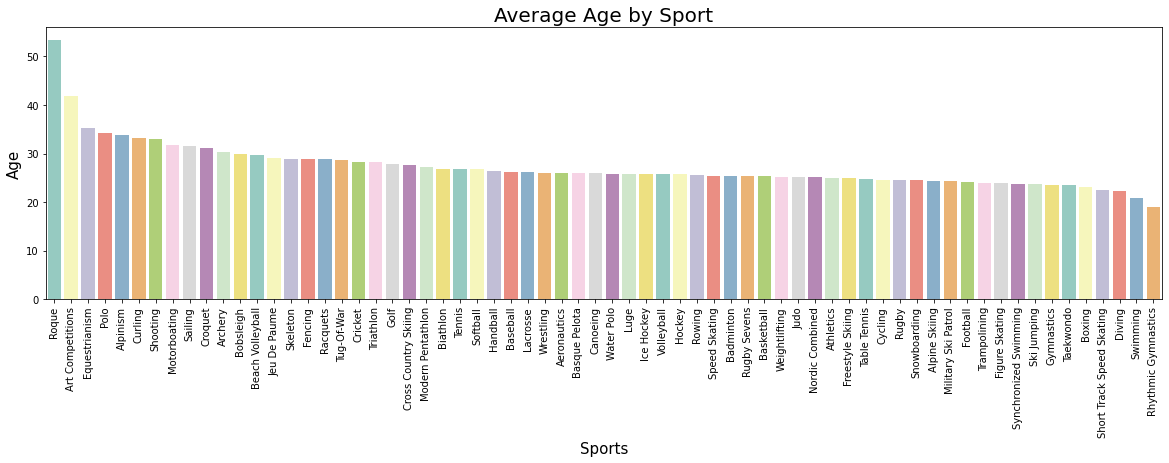

In [220]:
sports = list(df["Sport"].unique())
average_Age = []

for i in sports:
    x = df[df["Sport"] == i]
    average_age = sum(x["Age"])/len(x["Age"])
    average_Age.append(average_age)

newData = pd.DataFrame({'sports': sports,'average age':average_Age})
new_index = (newData['average age'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)

plt.figure(figsize = (20,5))
sns.barplot(x = sorted_data['sports'], y = sorted_data['average age'], palette= "Set3")
plt.xlabel('Sports', fontsize = 15, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Age', fontsize = 15, color = 'black')
plt.title('Average Age by Sport', fontsize = 20, color = 'black')
plt.show()

O gráfico acima nos informa a idade média para cada esporte. Podemos extrair disso resultantos um tanto quanto curiosos.

Os esportes com atletas mais velhos são o Roque, Competições Artísticas, Hipismo e Polo, por exemplo. Antes de mais nada, é importante ressaltar que o Roque foi considerado uma modalidade olímpica apenas na edição de 1904 (e nunca mais apareceu nos Jogos!). Hoje, é entendido como uma variação do Críquete, que também aparece no gráfico como um esporte de atletas mais velhos.

- Entre 40 e 50 anos, temos apenas Competições Artísticas e Roque;
- Entre 30 e 40 anos, ainda encontramos apenas esportes um pouco fora do gosto popular, como Hipismo, Alpinismo e Tiro;
- Entre 20 e 30 anos, temos uma mistura de esportes pouco e muito tradicionais, conhecidos do grande público. Nessa faixa, encontramos desde Jogo de Palma e - Bobsleigh até Tênis, Handebol, Beisebol, Vôlei, Basquete, Natação, Skate, Atletismo e Judô;
- Entre 10 e 20 anos, temos apenas Ginástica Rítmica. Sendo esse esporte, então, o mais jovem dentre os disputados nas Olímpiadas.